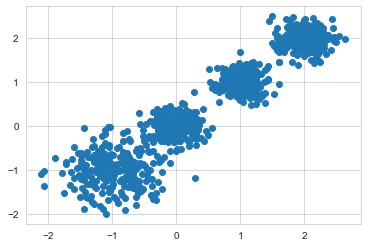

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 创建数据集
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=9)

# 数据集可视化
plt.scatter(X[:, 0], X[:, 1], marker='o')

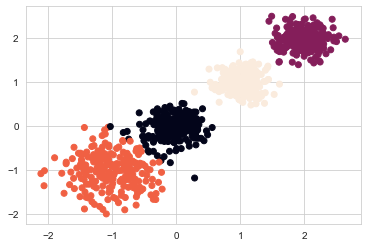

5924.050613480169


In [7]:
# 2.使用k-means进行聚类,并使用CH方法评估

y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
# 分别尝试n_cluses=2\3\4,然后查看聚类效果
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X, y_pred))

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
data = pd.read_csv(r"D:\黑马课程\人工智能教程\阶段3-人工智能机器学习\02_机器学习算法day09\02-代码\data\factor_returns.csv")
data

,index,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense,date,return
0,000001.XSHE,5.9572,1.1818,8.525255e+10,0.8008,14.9403,1.211445e+12,2.0100,2.070140e+10,1.088254e+10,2012-01-31,0.027657
1,000002.XSHE,7.0289,1.5880,8.411336e+10,1.6463,7.8656,3.002521e+11,0.3260,2.930837e+10,2.378348e+10,2012-01-31,0.082352
2,000008.XSHE,-262.7461,7.0003,5.170455e+08,-0.5678,-0.5943,7.705178e+08,-0.0060,1.167983e+07,1.203008e+07,2012-01-31,0.099789
3,000060.XSHE,16.4760,3.7146,1.968046e+10,5.6036,14.6170,2.800916e+10,0.3500,9.189387e+09,7.935543e+09,2012-01-31,0.121595
4,000069.XSHE,12.5878,2.5616,4.172721e+10,2.8729,10.9097,8.124738e+10,0.2710,8.951453e+09,7.091398e+09,2012-01-31,-0.002681
...,...,...,...,...,...,...,...,...,...,...,...,...
2313,601888.XSHG,25.0848,4.2323,2.274800e+10,10.7833,15.4895,2.784450e+10,0.8849,1.148170e+10,1.041419e+10,2012-11-30,0.060727
2314,601901.XSHG,59.4849,1.6392,2.281400e+10,1.2960,2.4512,3.810122e+10,0.0900,1.731713e+09,1.089783e+09,2012-11-30,0.179148
2315,601933.XSHG,39.5523,4.0052,1.702434e+10,3.3440,8.0679,2.420817e+10,0.2200,1.789082e+10,1.749295e+10,2012-11-30,0.137134
2316,601958.XSHG,52.5408,2.4646,3.287910e+10,2.7444,2.9202,3.883803e+10,0.1210,6.465392e+09,6.009007e+09,2012-11-30,0.149167


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2318 entries, 0 to 2317
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       2318 non-null   object 
 1   pe_ratio                    2318 non-null   float64
 2   pb_ratio                    2318 non-null   float64
 3   market_cap                  2318 non-null   float64
 4   return_on_asset_net_profit  2318 non-null   float64
 5   du_return_on_equity         2318 non-null   float64
 6   ev                          2318 non-null   float64
 7   earnings_per_share          2318 non-null   float64
 8   revenue                     2318 non-null   float64
 9   total_expense               2318 non-null   float64
 10  date                        2318 non-null   object 
 11  return                      2318 non-null   float64
dtypes: float64(10), object(2)
memory usage: 235.4+ KB


In [13]:
transfer = VarianceThreshold(threshold=1)
data = transfer.fit_transform(data.iloc[:, 1:10])
data

array([[ 5.95720000e+00,  1.18180000e+00,  8.52525509e+10, ...,
         1.21144486e+12,  2.07014010e+10,  1.08825400e+10],
       [ 7.02890000e+00,  1.58800000e+00,  8.41133582e+10, ...,
         3.00252062e+11,  2.93083692e+10,  2.37834769e+10],
       [-2.62746100e+02,  7.00030000e+00,  5.17045520e+08, ...,
         7.70517753e+08,  1.16798290e+07,  1.20300800e+07],
       ...,
       [ 3.95523000e+01,  4.00520000e+00,  1.70243430e+10, ...,
         2.42081699e+10,  1.78908166e+10,  1.74929478e+10],
       [ 5.25408000e+01,  2.46460000e+00,  3.28790988e+10, ...,
         3.88380258e+10,  6.46539204e+09,  6.00900728e+09],
       [ 1.42203000e+01,  1.41030000e+00,  5.91108572e+10, ...,
         2.02066110e+11,  4.50987171e+10,  4.13284212e+10]])

In [14]:
from scipy.stats import pearsonr
x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]
pearsonr(x1, x2)

(0.9941983762371884, 4.922089955456964e-09)

In [15]:
from sklearn.decomposition import PCA
data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

# 1、实例化PCA, 小数——保留多少信息
transfer = PCA(n_components=0.9)
# 2、调用fit_transform
data1 = transfer.fit_transform(data)

print("保留90%的信息，降维结果为：\n", data1)

# 1、实例化PCA, 整数——指定降维到的维数
transfer2 = PCA(n_components=3)
# 2、调用fit_transform
data2 = transfer2.fit_transform(data)
print("降维到3维的结果：\n", data2)

保留90%的信息，降维结果为：
 [[ 1.22879107e-15  3.82970843e+00]
 [ 5.74456265e+00 -1.91485422e+00]
 [-5.74456265e+00 -1.91485422e+00]]
降维到3维的结果：
 [[ 1.22879107e-15  3.82970843e+00  2.65047672e-17]
 [ 5.74456265e+00 -1.91485422e+00  2.65047672e-17]
 [-5.74456265e+00 -1.91485422e+00  2.65047672e-17]]


探究⽤户对物品类别的喜好细分

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
# 1.获取数据
import os
os.chdir(r'D:\黑马课程\人工智能教程\阶段3-人工智能机器学习\02_机器学习算法day09\02-代码')
order_product = pd.read_csv("./data/instacart/order_products__prior.csv")
products = pd.read_csv("./data/instacart/products.csv")
orders = pd.read_csv("./data/instacart/orders.csv")
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [19]:
# 2.1 合并表格
table1 = pd.merge(order_product, products, on=["product_id", "product_id"])
table2 = pd.merge(table1, orders, on=["order_id", "order_id"])
table = pd.merge(table2, aisles, on=["aisle_id", "aisle_id"])
table

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3243156,20731,1,0,Straight Sherry,134,5,166400,prior,3,1,13,12.0,specialty wines champagnes
32434485,860862,30582,1,0,Natural Champagne,134,5,104017,prior,13,5,14,18.0,specialty wines champagnes
32434486,1333472,27906,1,0,Imperial Champagne,134,5,62079,prior,10,3,10,10.0,specialty wines champagnes
32434487,2122701,26086,1,1,La Grand Dame Brut Champagne,134,5,77799,prior,2,3,14,3.0,specialty wines champagnes


In [20]:
table = pd.crosstab(table["user_id"], table["aisle"])
table = table[:1000]
table

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,5,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,1
997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
998,0,0,0,0,5,0,4,0,0,2,...,8,0,0,1,0,1,0,3,0,6


In [21]:
transfer = PCA(n_components=0.9)
data = transfer.fit_transform(table)
data

array([[-2.27452872e+01, -7.32942365e-01, -2.48945893e+00, ...,
        -4.78491473e+00, -3.10742945e+00, -2.45192316e+00],
       [ 5.28638801e+00, -3.00176267e+01, -1.11226906e+00, ...,
         9.24145693e+00, -3.11309382e+00,  2.20144174e+00],
       [-6.52593099e+00, -3.87333123e+00, -9.23859508e+00, ...,
        -1.33929081e+00,  1.25062993e+00,  6.12717485e-01],
       ...,
       [ 1.31226615e+01, -2.77296885e+01, -4.62403246e+00, ...,
         7.40793534e+00,  1.03829352e+00, -1.39058393e+01],
       [ 1.64905900e+02, -8.54916188e+01,  1.90577481e-02, ...,
        -5.62014943e+00, -1.38488891e+01, -7.11424774e+00],
       [-1.60244724e+00,  1.82037661e+00,  8.55756408e+00, ...,
         3.69860152e+00,  2.82248188e+00, -3.79491023e+00]])

In [23]:
estimator = KMeans(n_clusters=8, random_state=22)
y_pred = estimator.fit_predict(data)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 7, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 7, 1, 0,
       1, 6, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 7, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 7, 0,
       0, 0, 0, 1, 0, 7, 0, 1, 0, 0, 6, 4, 0, 0, 0, 7, 0, 1, 0, 0, 1, 1,
       1, 1, 3, 0, 0, 1, 7, 0, 1, 0, 0, 7, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       7, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 7, 0, 0, 1, 0, 0,
       0, 0, 4, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [24]:
silhouette_score(data, y_pred)

0.4640056725989442

In [27]:
import numpy as np
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7])

### 通过聚类分析进行用户分群

In [28]:
os.chdir(r'D:\黑马课程\人工智能V3.0（尊享无忧）\00 课程资料\4.阶段四机器学习\数据集')
dataset = pd.read_csv('data/customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
# 考虑最后两列作为分群依据
X = dataset.iloc[:, [3, 4]].values#全部行，第四第五列  Annual Income (k$) 和 Spending Score (1-100)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)#k=5
y_kmeans = kmeans.fit_predict(X)
#K-means与K-means++：
#原始K-means算法最开始随机选取数据集中K个点作为聚类中心，
#而K-means++按照如下的思想选取K个聚类中心：
#假设已经选取了n个初始聚类中心(0<n<K)，则在选取第n+1个聚类中心时：距离当前n个聚类中心越远的点会有更高的概率被选为第n+1个聚类中心。
#在选取第一个聚类中心(n=1)时同样通过随机的方法。
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [30]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4])

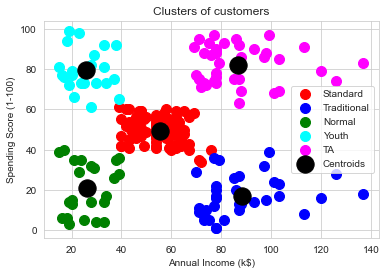

In [31]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Traditional')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Normal')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Youth')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'TA')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


C:\Users\17634\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


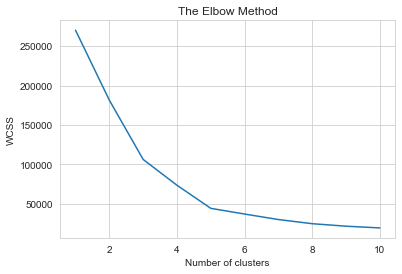

In [32]:
wcss = []
for i in range(1, 11): #循环使用不同k测试结果
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia簇内误差平方和
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
